# Assignment 2 - Landon Burleson 
## Problem 1
As described in the assignment document, this problem will discuss the derivation of the update rule
using the sigmoid activation function and the Mean Squared loss function. See the following LaTex
equations below for a step-by-step guide through the described derivation. 

The following equation is the Mean Square Error (MSE) Loss function used for this derivation:

$$MSE (L) = \frac{1}{n} \sum_{i = 1}^{n}(h_\theta(x^{(i)}) - y^{(i)})^2$$

The MSE derivative used for backpropagation and gradient descent is defined below:

$$ \frac{\partial L}{\partial W} = \frac{2}{n} [y_1 - y_1^* \cdots y_i - y_i^*]$$

$$ = \frac{2}{n} (Y - Y^*) $$

The sigmoid function used for the activation function within this example is shown below:

$$\sigma(x) = \frac{1}{1+e^x}$$

The derivative of the sigmoid function is shown here:
$$ \frac{\partial\sigma}{\partial x} = \frac{e^{-x}}{(1+e^{-x})^2}$$

The update rule equations via gradient descent are shown below for both the W and b parameters:
$$ W_i = W_i - \alpha \cdot \frac{\partial L}{\partial W_i} $$
$$ b_i = b_i - \alpha \cdot \frac{\partial L}{\partial b_i} $$

Considering the above equations, the following derivation showcases the necessary update rules for a
2-Layer architecture (i.e. 1 Input, 1 Hidden, 1 Output Layer).

$$\frac{\partial L}{\partial W_1} = $$
***

## Problem 2

The following git command is used to import the necessary files to run within the Google Colab
environment. 

In [1]:
#!git clone https://github.com/lrburle/ML_Assignment2.git

The following code block is the dependencies needed to run the __Problem 2__ code. Please view the
layer.py code for details in regards to how a layer object is defined and altered. This code is
available in the git repo referenced above for convenience. 

In [2]:
#Adding in the necessary modules needed to complete Assignment 2
import numpy as np
import matplotlib.pyplot as plt

from layer import Layer

In [3]:
class assign2:
        def mse(self, y_act, y_pred):
                n = y_act.shape[0]

                sum = 0

                for i in range(n):
                        sum += (y_pred[i]-y_act[i])**2
                error = (1/n) * sum
                return error 
        
        def mseDerivative(self, y_act, y_pred):
                return (2 / y_act.size) * (y_pred - y_act)

	#Used to modifify the input data appropriately
        def sigmoid(self, z):
                return 1 / (1 + np.exp(-z))

        def sigmoidDerivative(self, z):
                return self.sigmoid(z) * (1 - self.sigmoid(z))

        def tanh(self, z):
                return np.tanh(z)

        def tanhDerivative(self, z):
                return 1 - np.tanh(z)**2
        
        def relu(self, z):
                for i, val in enumerate(z[0, :]):
                        if z[:, i] >= 0:
                                z[:, i] = z[:, i]
                        else:
                                z[:, i] = 0
                return z
        
        def reluDerivative(self, z):
                for i, val in enumerate(z[0, :]):
                        if z[:, i] > 0:
                                z[:, i] = 1
                        if z[:, i] < 0:
                                z[:, i] = 0
                return z
        
        def softmax(self, z):
                return np.exp(z) / np.sum(np.exp(z))
        
        def linear(self, z):
                return z
        
        def linearDerivative(self, z):
                return np.ones((z.shape[0], z.shape[1]))

In [4]:
#Main Code - Creating the a2 object for NN functions.
a2 = assign2()

#Load in the data to be used for question 1
x_test = np.loadtxt('X_test.csv')
x_train = np.loadtxt('X_train.csv')
y_test = np.loadtxt('Y_test.csv')
y_train = np.loadtxt('Y_train.csv')

### P2 - Initial Data Set
The following code outputs the relationship between the input x and output y with each respective
feature set. See graph below for details. 

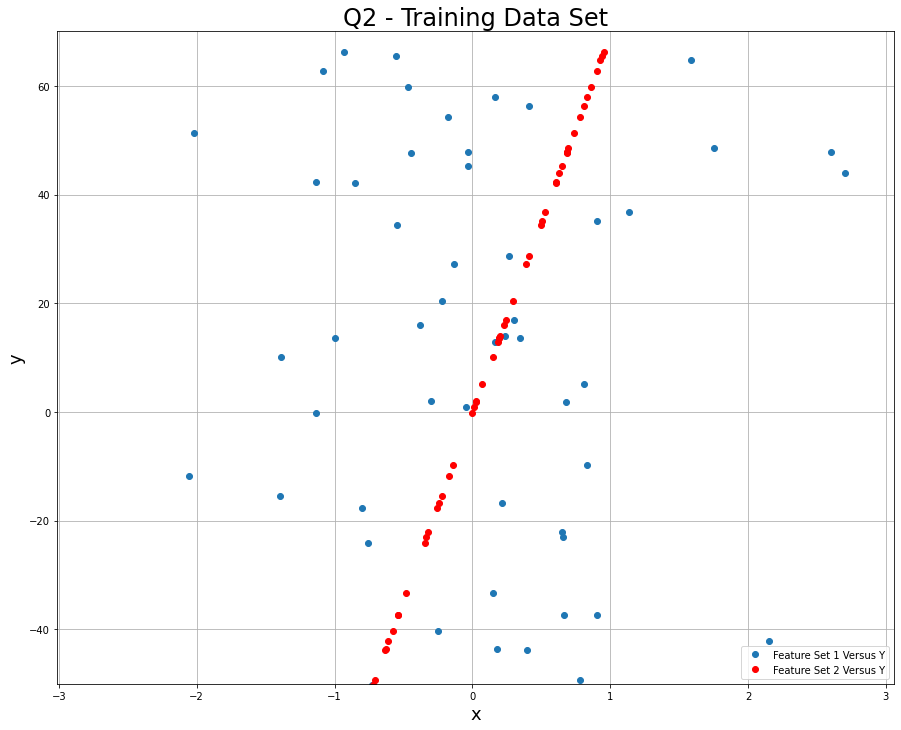

In [5]:
#Plot the initial training data.
plt.figure(0, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Training Data Set', fontsize=24)
plt.ylim(-50, 70)
train, test = plt.plot(x_train[:, 0], y_train, 'o',  x_train[:, 1], y_train, 'ro')

train.set_label('Feature Set 1 Versus Y')
test.set_label('Feature Set 2 Versus Y')
plt.grid()
plt.legend(loc='lower right')

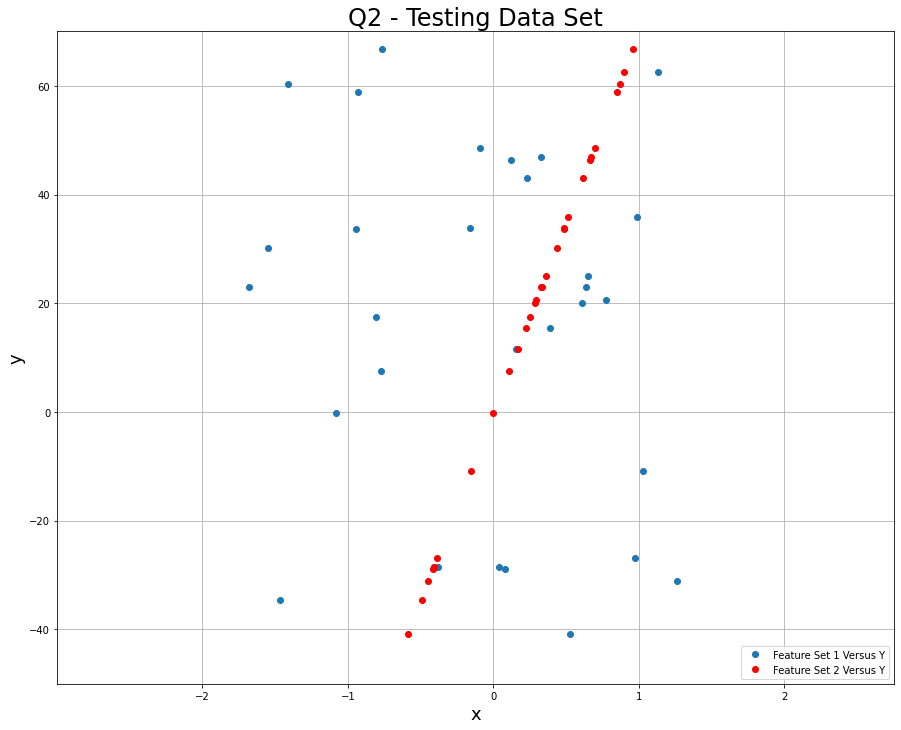

In [6]:
#Plot the initial testing data.
plt.figure(1, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Testing Data Set', fontsize=24)
plt.ylim(-50, 70)
train, test = plt.plot(x_test[:, 0], y_test, 'o',  x_test[:, 1], y_test, 'ro')

train.set_label('Feature Set 1 Versus Y')
test.set_label('Feature Set 2 Versus Y')
plt.grid()
plt.legend(loc='lower right')

### P2 - Training (Best MSE Convergence and Prediction Chart)

The following code in this section represents the code used to train the desired neural network with
the 1 - 1 - 1 architecture (1 input, 1 hidden, and 1 output layers).  

Current epochs is 0 @ loss = 4928.997935312179
Current epochs is 1 @ loss = 3569.944228858614
Current epochs is 2 @ loss = 2853.0545794846907
Current epochs is 3 @ loss = 2425.623143904855
Current epochs is 4 @ loss = 2128.722309673099
Current epochs is 5 @ loss = 1904.8032158669437
Current epochs is 6 @ loss = 1726.6679361367228
Current epochs is 7 @ loss = 1579.0394524477863
Current epochs is 8 @ loss = 1452.0513114162964
Current epochs is 9 @ loss = 1336.822718073191
Current epochs is 10 @ loss = 1227.2047864690608
Current epochs is 11 @ loss = 1126.252229986543
Current epochs is 12 @ loss = 1034.7665354302744
Current epochs is 13 @ loss = 952.4178078582045
Current epochs is 14 @ loss = 879.1671335429479
Current epochs is 15 @ loss = 814.2366500494769
Current epochs is 16 @ loss = 756.6324857255175
Current epochs is 17 @ loss = 705.4404689705493
Current epochs is 18 @ loss = 659.822345534724
Current epochs is 19 @ loss = 619.0069678385405
Current epochs is 20 @ loss = 582.3068347222

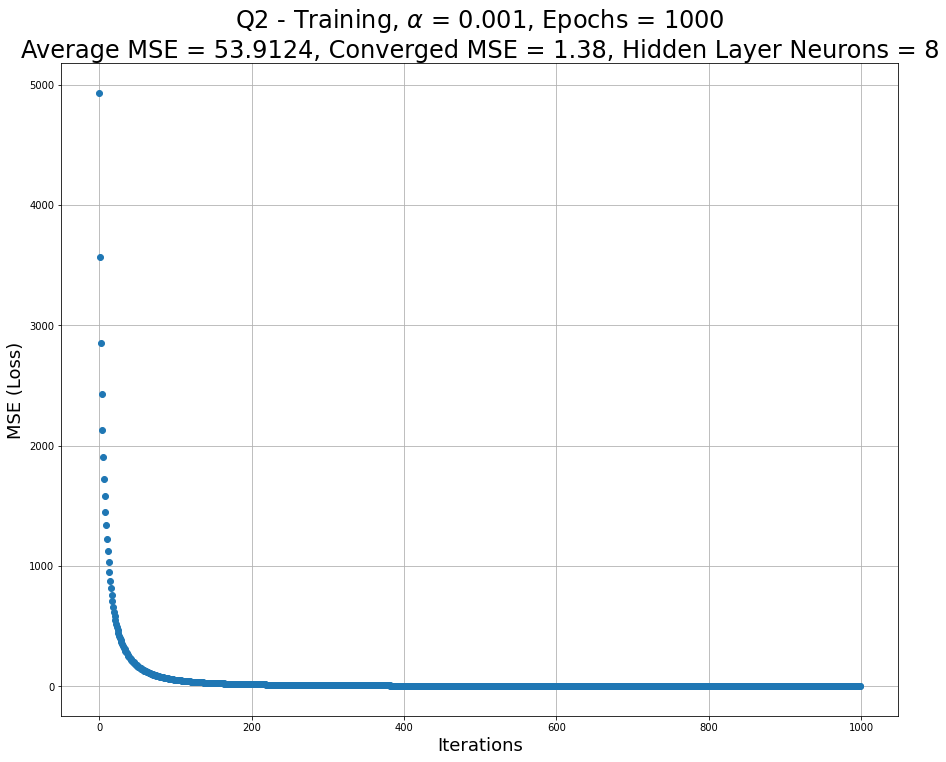

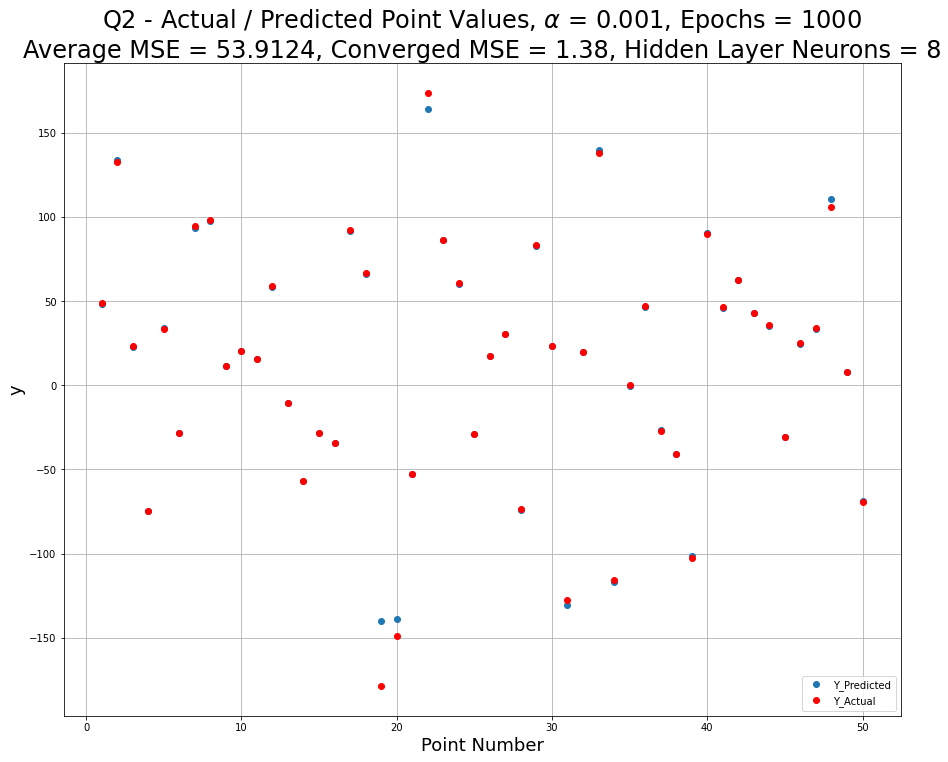

In [7]:
epochs = 1000
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')


### P2 - $\alpha$ Sweep

This section explores the effect of the varying the learning rate with respect to the MSE output. 

Current epochs is 0 @ loss = 5126.255612805345
Current epochs is 1 @ loss = 3909.824282286025
Current epochs is 2 @ loss = 3176.1916041100217
Current epochs is 3 @ loss = 2717.4574280069387
Current epochs is 4 @ loss = 2392.3993502680382
Current epochs is 5 @ loss = 2143.6060937362713
Current epochs is 6 @ loss = 1943.7661981586152
Current epochs is 7 @ loss = 1777.1695648723764
Current epochs is 8 @ loss = 1632.763923266013
Current epochs is 9 @ loss = 1498.8812636944076
Current epochs is 10 @ loss = 1372.8179639155173
Current epochs is 11 @ loss = 1259.7716546574081
Current epochs is 12 @ loss = 1158.9125395499095
Current epochs is 13 @ loss = 1069.2289471105216
Current epochs is 14 @ loss = 989.5956148060656
Current epochs is 15 @ loss = 918.8042443072767
Current epochs is 16 @ loss = 855.7255366520659
Current epochs is 17 @ loss = 799.3574512576415
Current epochs is 18 @ loss = 748.8161300173228
Current epochs is 19 @ loss = 703.3218422770848
Current epochs is 20 @ loss = 662.18840

/tmp/ipykernel_17826/234084705.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Current epochs is 65 @ loss = 713.4668003823666
Current epochs is 66 @ loss = 651.3191350675149
Current epochs is 67 @ loss = 649.8477064280183
Current epochs is 68 @ loss = 646.2195246897081
Current epochs is 69 @ loss = 652.2016779383332
Current epochs is 70 @ loss = 598.6801015257862
Current epochs is 71 @ loss = 614.5294214157443
Current epochs is 72 @ loss = 613.1949845654334
Current epochs is 73 @ loss = 614.8625543159727
Current epochs is 74 @ loss = 613.7328440321493
Current epochs is 75 @ loss = 640.4991273450975
Current epochs is 76 @ loss = 681.6043212083221
Current epochs is 77 @ loss = 655.0180603311354
Current epochs is 78 @ loss = 652.9551717405373
Current epochs is 79 @ loss = 597.6883217082033
Current epochs is 80 @ loss = 632.8435501915836
Current epochs is 81 @ loss = 617.8589603940617
Current epochs is 82 @ loss = 644.3831045059295
Current epochs is 83 @ loss = 615.2098742798881
Current epochs is 84 @ loss = 613.9565148237439
Current epochs is 85 @ loss = 603.492163

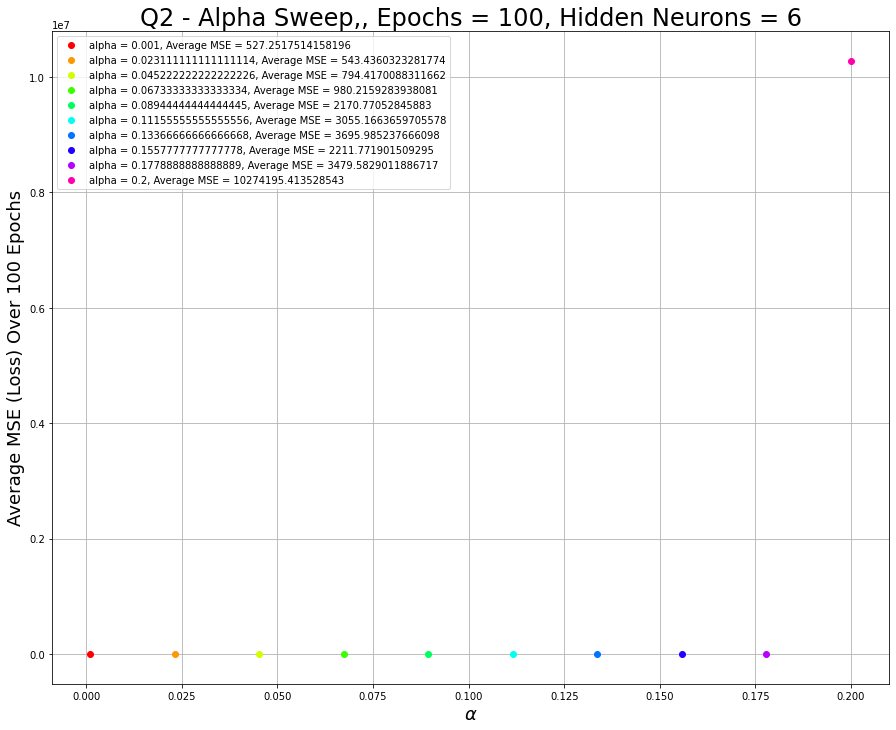

In [8]:
epochs = 100
hidden_layer_neurons = 6

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel(r'$\alpha$', fontsize=18)
plt.ylabel(f'Average MSE (Loss) Over {epochs} Epochs', fontsize=18)
plt.title(f'Q2 - Alpha Sweep,' f', Epochs = {epochs}, Hidden Neurons = {hidden_layer_neurons}', fontsize=24)

alpha_sweep = np.linspace(0.001, 0.2, 10)

#Used to cycle colors for the plots.
N = len(alpha_sweep)
cmap = plt.cm.get_cmap("hsv", N+1)

for idx, alpha in enumerate(alpha_sweep):
	iterations = []
	error = []

	#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
	hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
	output_layer = Layer(hidden_layer_neurons, 1, a2.linear, a2.linearDerivative, alpha)

	for k in range(epochs):
		y_pred = []
		iterations.append(k)
		# Iterate through training samples
		for i in range(x_train.shape[0]):
			out = np.array([x_train[i]])
			out = hidden_layer.forwardprop(out)
			out = output_layer.forwardprop(out)

			y_pred.append(out)

			# backward propagation
			loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
			loss_deriv_out = output_layer.backprop(loss_deriv_out)
			loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

		error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
		
		print(f'Current epochs is {k} @ loss = {error[-1]}')

	plt.plot(alpha, np.mean(error), 'o', c=cmap(idx), label=f'alpha = {alpha}, Average MSE = {np.mean(error)}')

plt.grid()
plt.legend(loc='upper left')

As shown above, the Average MSE exponentially increases as the learning rate increases towards 1. As
the learning rate approaches 1, the Average MSE approaches infinity as the Neural Network becomes
unstable. 
***

### P2 - Number of Neurons Sweep

This section explores how the Neural Network reacts when the neurons in the hidden layer are
increased from 1 to 10. 

Current epochs is 0 @ loss = 4571.146835948966
Current epochs is 1 @ loss = 3058.431654008128
Current epochs is 2 @ loss = 2308.7930874163308
Current epochs is 3 @ loss = 2397.6097261217815
Current epochs is 4 @ loss = 1857.7245929451628
Current epochs is 5 @ loss = 1924.4879415306928
Current epochs is 6 @ loss = 1775.5973085307862
Current epochs is 7 @ loss = 1746.6289820054678
Current epochs is 8 @ loss = 1646.4303313805867
Current epochs is 9 @ loss = 1731.0778851878226
Current epochs is 10 @ loss = 1709.753001668858
Current epochs is 11 @ loss = 1751.459533389199
Current epochs is 12 @ loss = 1731.1082113974073
Current epochs is 13 @ loss = 1653.0335525063272
Current epochs is 14 @ loss = 1675.1645334427246
Current epochs is 15 @ loss = 1678.285004443178
Current epochs is 16 @ loss = 2144.7558505398297
Current epochs is 17 @ loss = 2051.5211097112683
Current epochs is 18 @ loss = 1917.9565947150593
Current epochs is 19 @ loss = 1810.2299501151354
Current epochs is 20 @ loss = 1673.

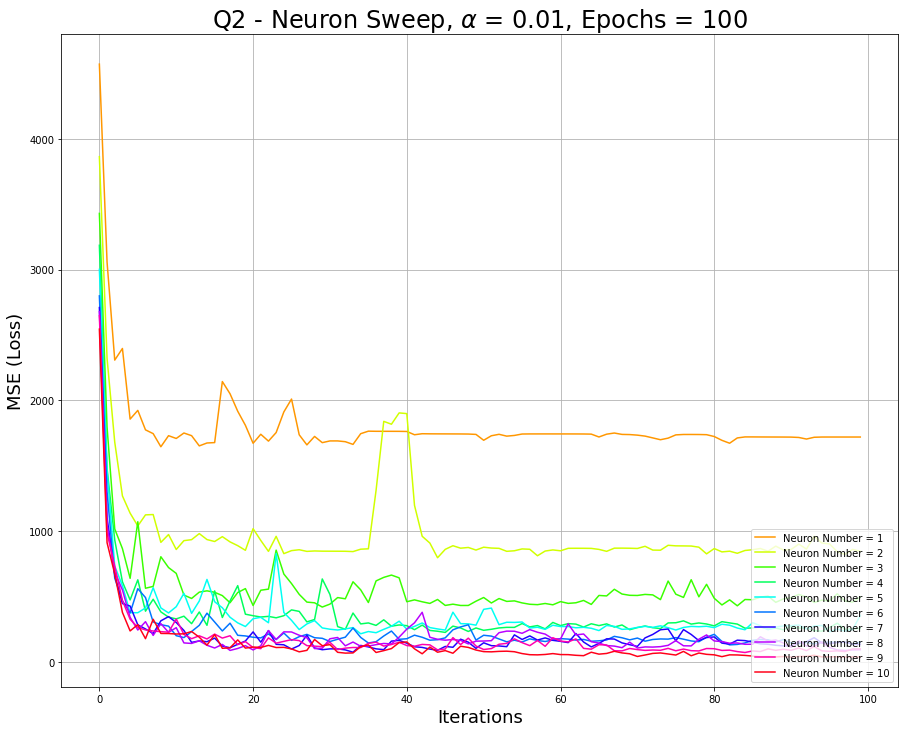

In [9]:
epochs = 100
alpha = 0.01

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)
plt.title(f'Q2 - Neuron Sweep,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}', fontsize=24)

neuron_sweep = [1,2,3,4,5,6,7,8,9,10]

#Used to cycle colors for the plots.
N = len(neuron_sweep)
cmap = plt.cm.get_cmap("hsv", N+1)

for n in neuron_sweep:
	hidden_layer_neurons = n
	iterations = []
	error = []

	#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
	hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
	output_layer = Layer(hidden_layer_neurons, 1, a2.linear, a2.linearDerivative, alpha)

	for k in range(epochs):
		y_pred = []
		iterations.append(k)
		# Iterate through training samples
		for i in range(x_train.shape[0]):
			out = np.array([x_train[i]])
			out = hidden_layer.forwardprop(out)
			out = output_layer.forwardprop(out)

			y_pred.append(out)

			# backward propagation
			loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
			loss_deriv_out = output_layer.backprop(loss_deriv_out)
			loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

		error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
		
		print(f'Current epochs is {k} @ loss = {error[-1]}')

	plt.plot(iterations, error, '-', c=cmap(n), label=f'Neuron Number = {n}')

plt.grid()
plt.legend(loc='lower right')

result =[]
for i in range(x_test.shape[0]):
	out = x_test[i]
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	result.append(out)



As can be seen from the chart above, as the number of neurons increase in the hidden layer, the
Average MSE approaches 0 over the course of a number of iterations. The neuron number between 5 and
10 seemed to converge around the same MSE value and have a negligible impact of the overall results.
Hidden layers with less than 5 neurons seem to be unstable and seem to be caught in a local minima
instead of the absolute minima of the objective function. Also, with the number of neurons
increasing, the greater the chance the network becomes overfitted to the data and memorizes instead
of generalize. In terms of the results shown in section __P2 - Training (Best MSE Convergence and
Prediction Chart)__ , the data seemed to fit quite nicely and generalized to the majority of points
with minimal error in predictions. 
***

### P2 - Activation Function Experimentation

This section explores the effect of different activation functions of the performance of the Neural
Network. 

Current epochs is 0 @ loss = 2897.1940647138213
Current epochs is 1 @ loss = 985.6613025971908
Current epochs is 2 @ loss = 638.1605772342178
Current epochs is 3 @ loss = 308.504033142525
Current epochs is 4 @ loss = 198.17285658092516
Current epochs is 5 @ loss = 152.6081701283501
Current epochs is 6 @ loss = 104.61072485364186
Current epochs is 7 @ loss = 88.35136416392534
Current epochs is 8 @ loss = 80.91572254425544
Current epochs is 9 @ loss = 77.41995294789088
Current epochs is 10 @ loss = 91.47138281193868
Current epochs is 11 @ loss = 76.04361193820485
Current epochs is 12 @ loss = 73.98487210152967
Current epochs is 13 @ loss = 88.46405115725338
Current epochs is 14 @ loss = 69.7894551628507
Current epochs is 15 @ loss = 60.56537020313309
Current epochs is 16 @ loss = 57.5535133883821
Current epochs is 17 @ loss = 69.81387113261103
Current epochs is 18 @ loss = 51.46774831011738
Current epochs is 19 @ loss = 87.20435238743372
Current epochs is 20 @ loss = 60.99465855666699
Cu

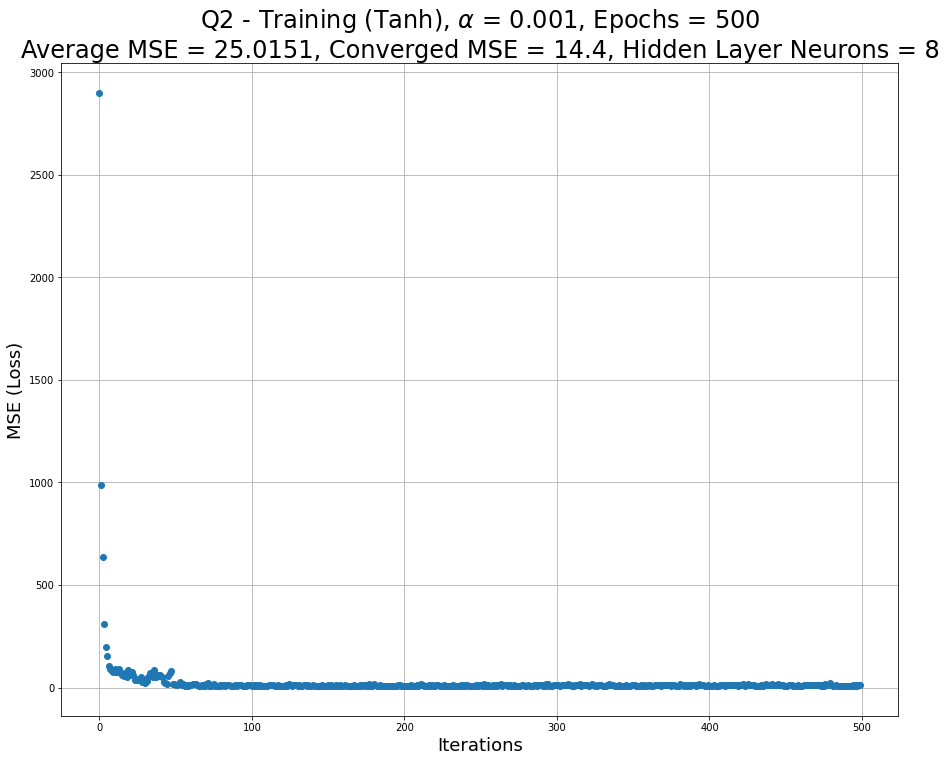

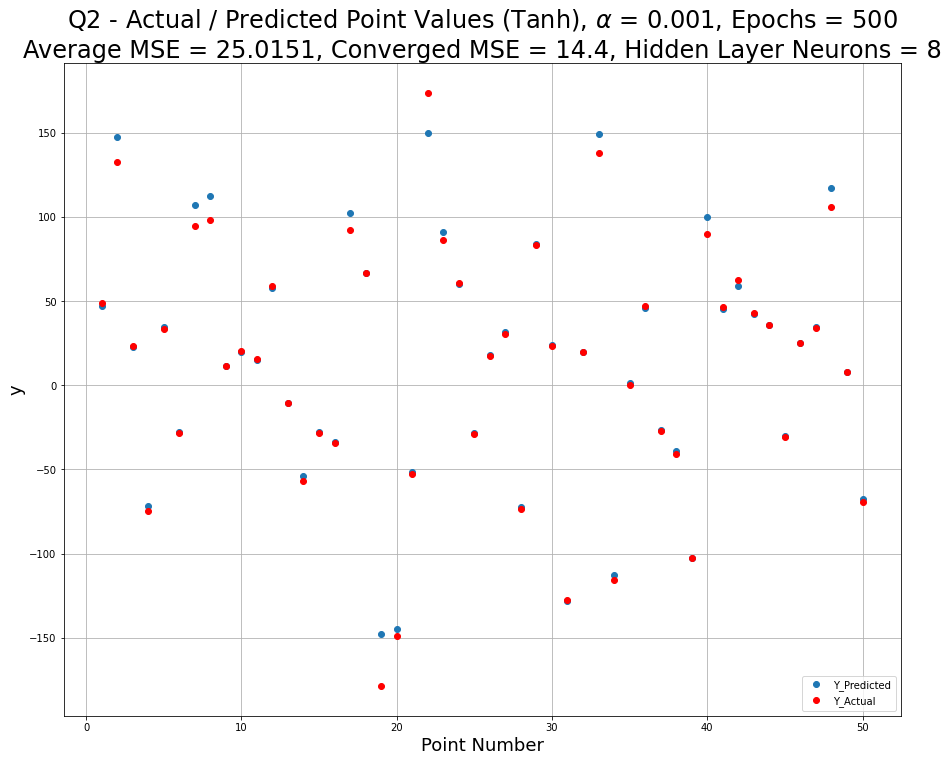

In [10]:
epochs = 500
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.tanh, a2.tanhDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training (Tanh),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values (Tanh),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')

Current epochs is 0 @ loss = 2656.694217492709
Current epochs is 1 @ loss = 1900.9817121129845
Current epochs is 2 @ loss = 1676.8499577852415
Current epochs is 3 @ loss = 1489.4653491049764
Current epochs is 4 @ loss = 1329.9963082130184
Current epochs is 5 @ loss = 1192.9838404871107
Current epochs is 6 @ loss = 1074.6497720735765
Current epochs is 7 @ loss = 972.0920609428648
Current epochs is 8 @ loss = 883.1363461861287
Current epochs is 9 @ loss = 805.890500709708
Current epochs is 10 @ loss = 738.5638267870413
Current epochs is 11 @ loss = 679.6218073306945
Current epochs is 12 @ loss = 627.6919262539328
Current epochs is 13 @ loss = 581.7335611540597
Current epochs is 14 @ loss = 540.7938522735138
Current epochs is 15 @ loss = 504.2909320437471
Current epochs is 16 @ loss = 471.66255640603674
Current epochs is 17 @ loss = 442.26144864113536
Current epochs is 18 @ loss = 415.583007381938
Current epochs is 19 @ loss = 391.25276098069963
Current epochs is 20 @ loss = 368.981084283

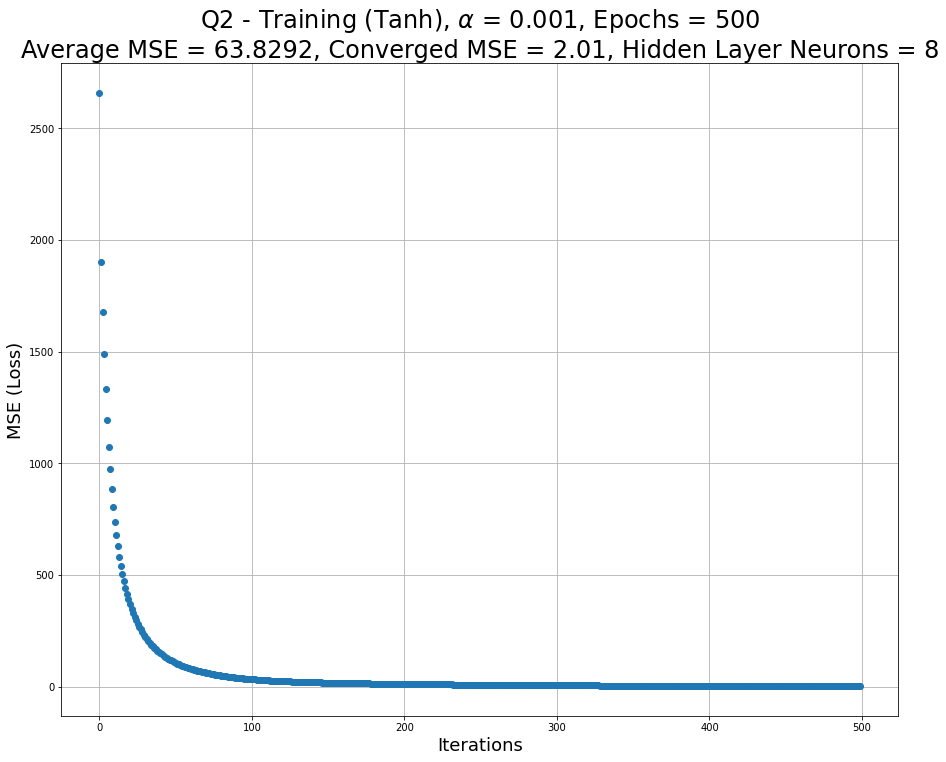

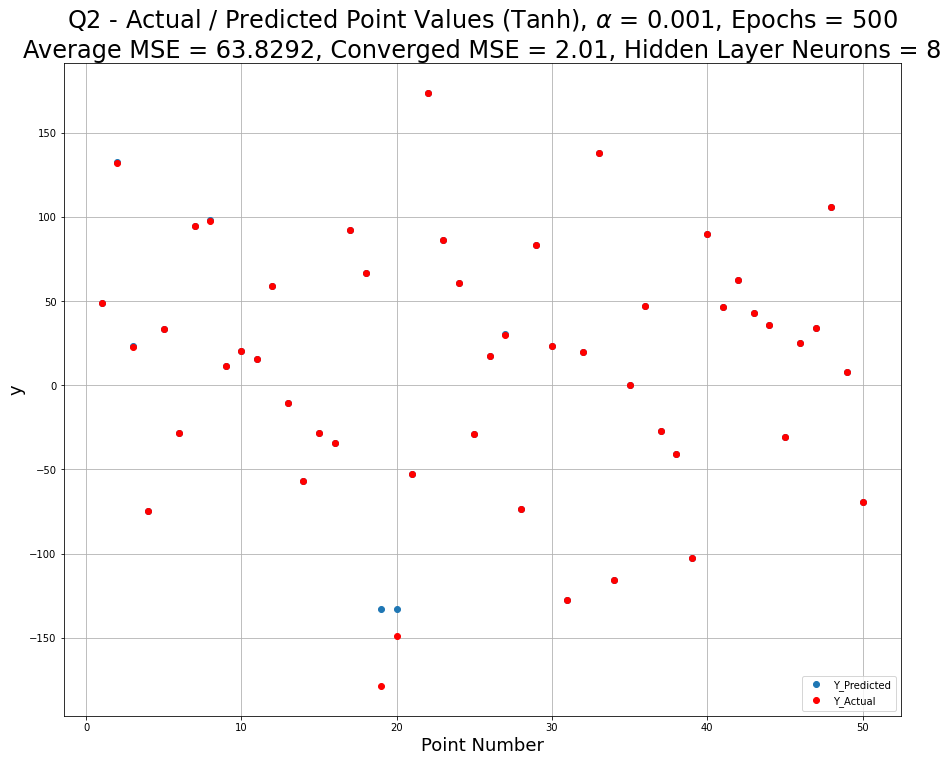

In [11]:
epochs = 500
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.relu, a2.reluDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training (ReLU),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values (ReLU),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')

As shown above, the TanH and ReLU activation functions were used to train the Neural Network with
the results shown above. In comparison of performance between Sigmoid, TanH, and ReLU, the TanH
function seemed to converge the fastest with the same learning rate and topology. In terms of the
function used, I believe this is due to TanH included negative values while the others omit the
negative values. Since the data set has values that are less than zero, the using the hyperbolic
tangent function seems to provide the best performance in relation to the input data. 
***

## P3 - Question Responses

1. A linear activation function would best serve the needs for the output layer since the output
   ranges between -40 and 65 per the test and training set. Majority of the activation functions
   would truncate or ignore the negative values of the output and produce incorrect predictions. 

2. There should only be a single neuron in the output layer due to the dimensions of the output being
   singular per training / test set. The data set is a regression is regressive in nature. No
   classification required. 

3. The best metrics achieved can be reviewed in the __P2 - Training (Best MSE Convergence and
   Prediction Chart)__ section shown above. The Average MSE for 1000 epochs and $\alpha$ 0.001
   learning rate, hovers around 53 - 50 per run. 

4. Please refer to the __P2 - Training (Best MSE Convergence and
   Prediction Chart)__ section above for more information regarding the plot
   between MSE loss versus epochs (iterations). 

5. The learning rate effects the performance of the neural network by the speed at which updates
   occur during gradient descent for backpropagation for each individual layer in the network. As
   the learning rate was increased, the performance decreased significantly and convergence was
   non-existent due to the extreme learning rates involved. A learning rate 0.18 or less seemed to
   perform the best in terms of convergence and accuracy in regards to predictions.   

6. 
   a. The update rule does not need to be changed or derived again due to the fact that only the
   weight and bias matrices change in accordance to the number of neurons in each hidden layer. The
   architecture of the network hasn't changed. 

   b. As seen in section __P2 - Number of Neurons Sweep__ , as the number of neurons increased, the
   MSE also generally improved. The true turning point is the transition between 4 and 5 neurons in
   the layer. As the number of neurons increased past 5, the performance of the networks saw
   diminishing improvements. Too many neurons could also cause overfitting to occur to the data set.

7. 
   a / b. The update rule would need to be changed in order to accommodate the derivative of the new
   activation function inside of the backpropagation function. However, this is the only change
   required to operate the neural network.  
   
   c. The results of utilizing different activations functions proved to be useful for the dataset.
   The Tanh function provided the fastest convergence with the same network architecture and
   learning rate. This is due to the Tanh function utilizing negative values while ReLU and sigmoid
   either ignore or truncate between 0 and 1 respectively. Due to the datasets utilizing negative
   values, the Tanh function makes sense to use to capture those feature characteristics. 